<a href="https://colab.research.google.com/github/TiagoDeserth/Ci-ncia-de-Dados/blob/main/Ci%C3%AAncia_de_Dados_Aula_Regress%C3%A3o_Linear_(21_10_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conhecer o Dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore') #Filtragem de erros (alertas)

###Dataset de exemplo

**Y = Gastos das famílias**

**X = Rendas das famílias**

In [ ]:
dataset = { 'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770], 
            'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800] }

In [ ]:
dataset = pd.DataFrame(dataset) #Transformando dataset de dicionário para DataFrame
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [ ]:
dataset.shape #Quantidade de registros (Linhas x Colunas)

(50, 2)

In [ ]:
dataset.describe()

,Y,X
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


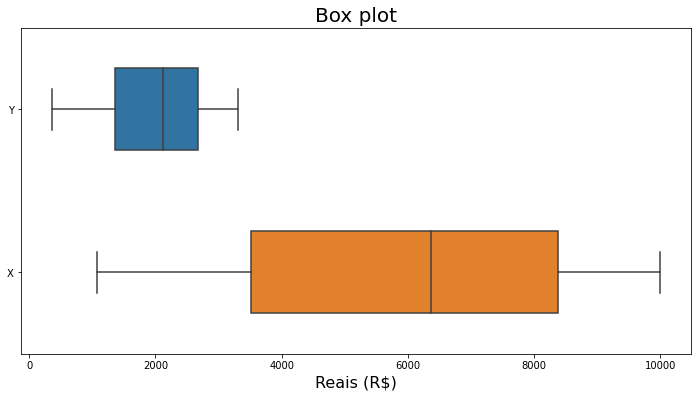

In [ ]:
ax  = sns.boxplot(data = dataset, orient = 'h', width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

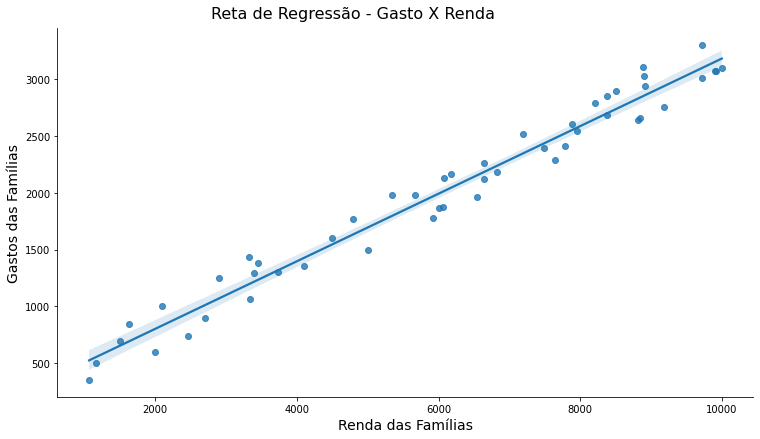

In [ ]:
ax  = sns.lmplot(data = dataset, x='X', y='Y')
ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels('Renda das Famílias', fontsize=14)
ax.set_ylabels('Gastos das Famílias', fontsize=14)
ax

In [ ]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


###Rodando a Regressão

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [ ]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


In [ ]:
resultado_regressao =  sm.OLS(Y, X).fit()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           3.56e-38
Time:                        22:46:16   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

In [ ]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


#Correlação

#Covariância

###A covariância ou variância conjunta é a medida do grau de interdependência númerica entre duas variáveis. É definida da seguinte forma: 

###Covariância Populacional

# $$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

###Covariância Amostral

# $$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

In [ ]:
dados = pd.read_csv('dados.csv')

In [ ]:
amostra = dados.query('Renda < 5000').sample(n = 20, random_state = 101)
amostra

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
5051,14,0,39,8,6,1500,1.616243
72082,52,0,29,8,7,1000,1.752518
5521,15,1,21,8,12,3500,1.694016
13849,22,0,49,2,13,1570,1.804156
14285,22,0,29,8,9,600,1.785481
57207,41,1,34,2,12,1200,1.746864
14720,23,0,32,4,12,2000,1.663362
17552,23,0,32,8,6,500,1.693730
49020,35,0,24,6,7,1300,1.656948
2852,13,0,53,8,5,600,1.667109


In [ ]:
amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov()

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


$\sigma_{XY}$ positivo: indica uma associação linear positiva entre x e y, ou seja, a medida que o valor de x aumenta, o valor de y também aumenta. Nesse caso, os pontos da Figura que tem maior influência estão nos quadrantes I e III. 

$\sigma_{XY}$ negativo: a medida que o valor de x aumenta, o valor de y diminui. Nesse caso, os pontos da Figura que tem maior influência estão nos quadrantes II e IV.

$\sigma_{XY}$ próximo de zero: os dados ficam unirformemente distribuídos.

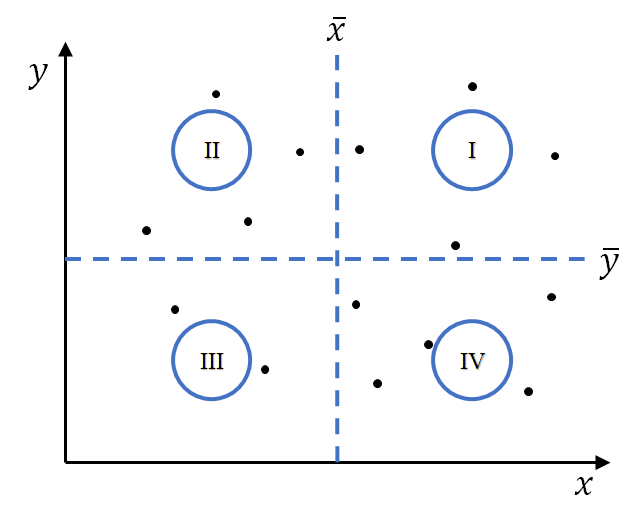

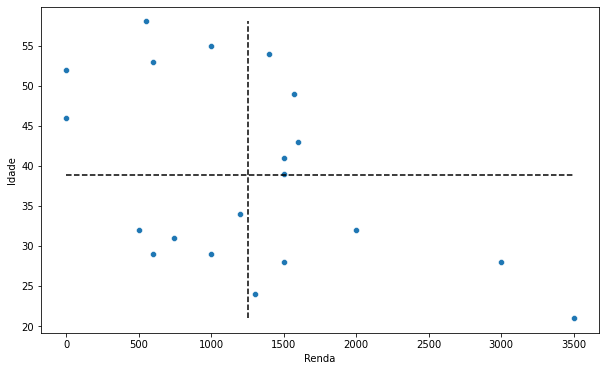

In [ ]:
x = amostra.Renda
y = amostra.Idade

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10,6)
ax.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')
ax.vlines(x=x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')
#Covariância -> Negativa

7

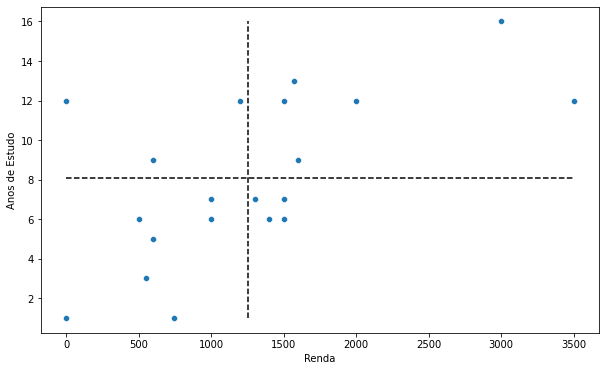

In [ ]:
x = amostra.Renda
y = amostra['Anos de Estudo']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10,6)
ax.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')
ax.vlines(x=x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')
#Covariância -> Positiva
2 | 1
3 | 4

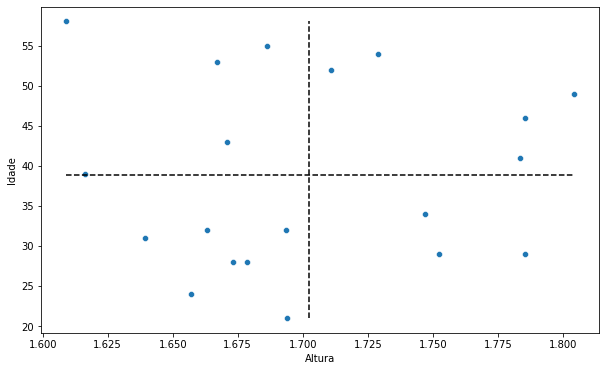

In [ ]:
x = amostra.Altura
y = amostra.Idade

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10,6)
ax.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')
ax.vlines(x=x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')
#Covariância -> Próximo de zero

##Coeficiente de Correlação de Pearson

É obtido dividindo-se a covariância da população ou amostra pelo produto do desvio padrão populacional ou amostral de x pelo desvio padrão populacional ou amostral de y.


O coeficiente de correlação varia de -1 a 1. Valores que se aproximam de -1 ou 1 indicam relação linear forte. Quanto mais próxima a correlação estiver de zero, mais fraca ela será.

**Atenção!!!** Coeficiente de correlação é uma medida de associação linear e não necessariamente de causação (dependencia).

###Coeficiente de correlação de Pearson - Dados populacionais

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

###Coeficiente de correlação de Perason - Dados amostrais

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

In [ ]:
s_xy = dados[['Altura', 'Renda']].cov()
s_xy = s_xy.Altura.loc['Renda']
s_xy

-1.0789639314252715

In [ ]:
s_x = dados.Altura.std()
s_y = dados.Renda.std()

In [ ]:
r_xy = s_xy/(s_x * s_y)
r_xy

-0.0040726081434002874

In [ ]:
dados[['Altura', 'Renda']].corr()

,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


#Função de Regressão Populacional

A equação representada a seguir é conhecida como função de regressão populacional:

# $$E(Y|X_i) = \beta_1+\beta_2X_i$$

Ela afirma o valor esperado da distribuição de $Y$, dado $X_i$ tem regressão funcional com $X_i$, isto é, a resposta média de $Y$ varia com $X$. Os coeficientes $\beta_1$ e $\beta_2$ são conhecidos como coeficientes de regressão e também conhecidos como intercepto e coeficiente angular. 

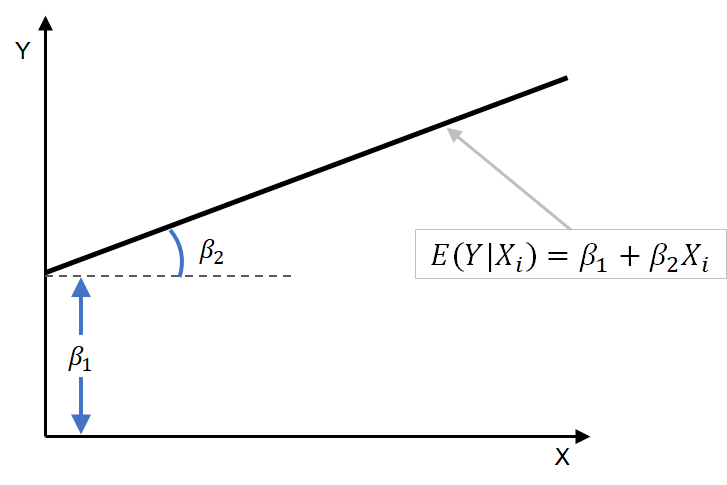

O gráfico e o primeiro exemplo acima deixa claro que com o aumento da renda familiar, em média, as  despesas de consumo das famílias aumentam, mas não em mesmo nível. O que podemos dizer é que para um nível de renda $X_i$ as despesas médias de consumo de uma família agrupam-se em torno do consumo médio de tdoas as famílias deste nível $X_i$ (em torno de sua esperança condicional). Portanto, podemos expressar o desvio individual de $Y_i$ em torno de seu valor esperado da seguinte forma: 

# $$u_i = Y_i - E(Y|X_i)$$

ou

# $$Y_i = u_i + E(Y|X_i)$$

onde o desvio $u_i$ é uma variável aleatório não-observável que assume valores positivos ou negativos, também conhecida como erro estocástico. 

Observe que podemos representar a FRP em sua forma estocástica da seguinte maneira:

# $$Y_i = \beta_1+\beta_2X_i+u_i$$



#O Método dos Mínimos Quadrados (04/11/2022)

**Função de regressão da população (FRP)**

# $$Y_i = \beta_1+\beta_2X_i+u_i$$

A FRP não pode ser obtida de forma direta, então estimamos os Betas por meio de uma **função de regressão amostral (FRA).**

#$$Y_i = \hat{\beta_1}+\hat{\beta_2}X_i+\hat{u}_i$$

#$$Y_i = \hat{Y}_i+\hat{u}_i$$

#$$Y_i - \hat{Y}_i=\hat{u}_i$$

#$$Y_i - \hat{\beta_1}+\hat{\beta_2}X_i=\hat{u}_i$$

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

# $$\sum\hat{u}_i^2=\sum{(Y_i - \hat{Y}_i)^2}$$

#Fórmulas

# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

In [ ]:
n = len(dataset) #O n é da fórmula do Beta 2 e também o tamanho do dataset
n

50

In [ ]:
SOMA_Y = dataset.Y.sum()
SOMA_Y

100556

In [ ]:
SOMA_X = dataset.X.sum()
SOMA_X

303275

In [ ]:
dataset['X2'] = dataset.X**2
dataset.head()

,Y,X,Y_previsto,X2,X**2
0,3011,9714,3095.785086,94361796,94361796
1,1305,3728,1316.203010,13897984,13897984
2,1879,6062,2010.079483,36747844,36747844
3,2654,8845,2837.439476,78234025,78234025
4,2849,8378,2698.604723,70190884,70190884


In [ ]:
SOMA_X2 = dataset.X2.sum()
SOMA_X2

2198628939

In [ ]:
dataset['XY'] = dataset.X*dataset.Y
dataset.head()

,Y,X,Y_previsto,X2,X**2,XY
0,3011,9714,3095.785086,94361796,94361796,29248854
1,1305,3728,1316.203010,13897984,13897984,4865040
2,1879,6062,2010.079483,36747844,36747844,11390498
3,2654,8845,2837.439476,78234025,78234025,23474630
4,2849,8378,2698.604723,70190884,70190884,23868922


In [ ]:
SOMA_XY = dataset.XY.sum()
SOMA_XY

716683794

In [ ]:
#Excluindo colunas desejadas
dataset.drop(['X**2', 'X2', 'XY'], axis=1, inplace=True)
dataset.head()

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


In [ ]:
#Cálculo final de acordo com a fórmula do Beta 2
numerador = n * SOMA_XY - SOMA_X * SOMA_Y
denominador = n * SOMA_X2 - (SOMA_X)**2
beta_2 = numerador/denominador
beta_2

0.29729069099372424

# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

In [ ]:
beta_1 = dataset.Y.mean() - beta_2 * dataset.X.mean()
beta_1

207.90331377756547

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [ ]:
resultado_regressao = sm.OLS(Y, X, missing = 'drop').fit()

In [ ]:
resultado_regressao.params

const    207.903314
X          0.297291
dtype: float64

#$$\hat{Y}_i = 207,9033 + 0,2973X_i$$

In [ ]:
dataset['Y_previsto2'] = beta_1 + beta_2 * dataset.X
dataset

,Y,X,Y_previsto,Y_previsto2
0,3011,9714,3095.785086,3095.785086
1,1305,3728,1316.203010,1316.203010
2,1879,6062,2010.079483,2010.079483
3,2654,8845,2837.439476,2837.439476
4,2849,8378,2698.604723,2698.604723
5,1068,3338,1200.259640,1200.259640
6,2892,8507,2736.955222,2736.955222
7,2543,7947,2570.472435,2570.472435
8,3074,9915,3155.540515,3155.540515
9,849,1632,693.081721,693.081721


In [ ]:
#Resultado obtido manualmente
def prever(x):
  return beta_1 + beta_2 * x

In [ ]:
prever(7510)

2440.5564031404347

In [ ]:
# Resultado com apoio da biblioteca
resultado_regressao.predict([1, 7510])[0]

2440.556403140435

In [ ]:
dataset['u'] = dataset.Y - dataset.Y_previsto
dataset.head()

,Y,X,Y_previsto,Y_previsto2,u
0,3011,9714,3095.785086,3095.785086,-84.785086
1,1305,3728,1316.203010,1316.203010,-11.203010
2,1879,6062,2010.079483,2010.079483,-131.079483
3,2654,8845,2837.439476,2837.439476,-183.439476
4,2849,8378,2698.604723,2698.604723,150.395277


In [ ]:
#Melhorando a visualização excluindo a coluna 'Y_previsto2'
dataset.drop(['Y_previsto2'], axis=1, inplace=True)
dataset.head()

,Y,X,Y_previsto,u
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


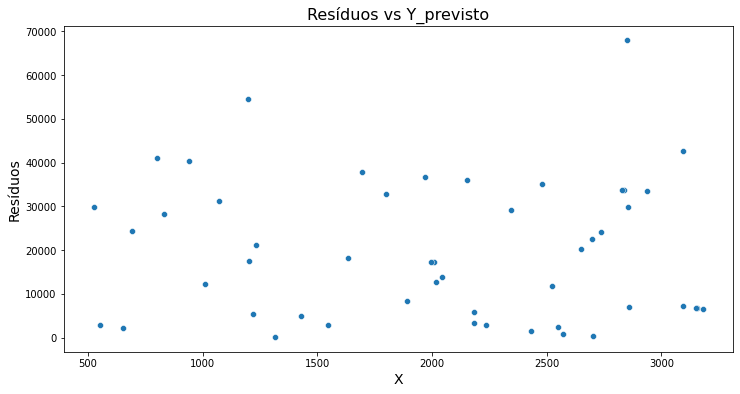

In [ ]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.u**2)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos vs Y_previsto', fontsize=16)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           3.56e-38
Time:                        23:30:10   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0